In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset


# Display the data table for preview


df_mouse
df_clinical

df = pd.merge(df_clinical, df_mouse, on = "Mouse ID", how = "outer")

df.head()



# Debug Statements
# ~~~~~~~~~~~~~~~~~~~~

# df.describe()
# df_clinical.describe()
# df_mouse.describe()

# df_mouse.columns
# df_clinical.columns

# df.columns

# df.head(1000)
# df_clinical.head(len(df_clinical))

# len(df_clinical["Mouse ID"].unique())

# len(df['Drug'].unique())
# len(df['Tumor Volume (mm3)'])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame




mean_tumorvol = df.groupby(["Drug", "Timepoint"])

mean_tumorvol = pd.DataFrame(mean_tumorvol.mean())

del mean_tumorvol['Metastatic Sites']


# To make these useable, append .to_list() and remove pd.DataFrame()
# Right now this is the primary way we are storing individual drug's mean, and count data. May not be the best.
df_capomulin_tumor = pd.DataFrame(mean_tumorvol.iloc[range(0,10),:])
df_ceftamin_tumor = pd.DataFrame(mean_tumorvol.iloc[range(10,20),:])
df_infubinol_tumor = pd.DataFrame(mean_tumorvol.iloc[range(20,30),:])
df_ketapril_tumor = pd.DataFrame(mean_tumorvol.iloc[range(30,40),:])
df_naftisol_tumor = pd.DataFrame(mean_tumorvol.iloc[range(40,50),:])
df_placebo_tumor = pd.DataFrame(mean_tumorvol.iloc[range(50,60),:])
df_propriva_tumor = pd.DataFrame(mean_tumorvol.iloc[range(60,70),:])
df_ramicane_tumor = pd.DataFrame(mean_tumorvol.iloc[range(70,80),:])
df_stelasyn_tumor = pd.DataFrame(mean_tumorvol.iloc[range(80,90),:])
df_zoniferol_tumor = pd.DataFrame(mean_tumorvol.iloc[range(90,100),:])

df_meantumor_reset = mean_tumorvol.reset_index()

df_meantumor_reset

mean_tumorvol.head()






# Debug Statements
# ~~~~~~~~~~~~~~~~~

# df_munged = df_munged.reset_index()

# df_meantumor_reset = mean_tumorvol.reset_index()

# df_meantumor_reset.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame


In [4]:
# Need to use DataFrame.sem(axis, skipna = False)
# Question is how to test each timepoint individually. Meaning all timepoints = 0 are their
# own group for example. At timepoint = 0 all tumors start at 45mm meaning the SEM is always 0.
# SEM is the rms of the std deviation divided by n-1 with that quantity divided by the square root of n.
# It is a singular value not a range of values.

# Getting the mean is no problem, but which are the actual values I'm comparing with? And how to get
# them? Is it the raw unfiltered values or the average values calculated from groupby.mean()? Also keep in mind
# there are 100 mean tumor vols but 1906 tumor vol measurements with ten measurements for ten drugs.

# Might need to make custom columns, comprising of one particular drug's values and run that through
# df.sem() individually. Capomulin at timepoint 0 would be one column in its entirety for example.




# Following code doesn't quite seem to work.
# df_semvalues = df.sem(axis = 1)
# df_semvalues


# Great way to extract values from the dataframe so far...
timepointsreformatted = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

list_drugs = df.Drug.unique()
timepoints = []
tumorvols = []
metasites = []
drugnames = []

for x in list_drugs:
    for y in range(len(df['Drug'])):
        
        if df.iloc[y, 4] == x: # Using the 4th column because in original dataframe, that's the 'drug' column
            
            drugnames.append(x) #Again, column indices are respective to orginial dataframe
            timepoints.append(df.iloc[y,1])
            tumorvols.append(df.iloc[y,2])
            metasites.append(df.iloc[y,3])
            
df_alldrugvalues = pd.DataFrame({'Drug':drugnames, 'Time Points':timepoints, 'Tumor Volumes':tumorvols, "Metastatic Sites":
                                metasites})


# We're going to use this table to extract the SEM values...
df_alldrugvalues.head(len(df_alldrugvalues))

capomulin = df_alldrugvalues.loc[df_alldrugvalues['Drug'] == 'Capomulin']
infubinol = df_alldrugvalues.loc[df_alldrugvalues['Drug'] == 'Infubinol']
ketapril = df_alldrugvalues.loc[df_alldrugvalues['Drug'] == 'Ketapril']
placebo = df_alldrugvalues.loc[df_alldrugvalues['Drug'] == 'Placebo']




# I'm gonna keep these just in case...
capomulin = df_alldrugvalues.loc[df_alldrugvalues['Drug'] == 'Capomulin']
camp0_sem = capomulin.loc[capomulin['Time Points'] == 0]["Tumor Volumes"].sem()
camp5_sem = capomulin.loc[capomulin['Time Points'] == 5]["Tumor Volumes"].sem()
camp10_sem = capomulin.loc[capomulin['Time Points'] == 10]["Tumor Volumes"].sem()
camp15_sem = capomulin.loc[capomulin['Time Points'] == 15]["Tumor Volumes"].sem()
camp20_sem = capomulin.loc[capomulin['Time Points'] == 20]["Tumor Volumes"].sem()
camp25_sem = capomulin.loc[capomulin['Time Points'] == 25]["Tumor Volumes"].sem()
camp30_sem = capomulin.loc[capomulin['Time Points'] == 30]["Tumor Volumes"].sem()
camp35_sem = capomulin.loc[capomulin['Time Points'] == 35]["Tumor Volumes"].sem()
camp40_sem = capomulin.loc[capomulin['Time Points'] == 40]["Tumor Volumes"].sem()
camp45_sem = capomulin.loc[capomulin['Time Points'] == 45]["Tumor Volumes"].sem()


# This method works great. It expedites the above process with loops. We end up with columns of
# sem values. You'll see this repeated for met. sites.
camp_sems= []
infu_sems = []
keta_sems = []
plac_sems = []

for i in timepointsreformatted:
    
    temp_sem = capomulin.loc[capomulin['Time Points'] == i]["Tumor Volumes"].sem()
    
    camp_sems.append(temp_sem)


for i in timepointsreformatted:
    
    temp_sem = infubinol.loc[infubinol['Time Points'] == i]["Tumor Volumes"].sem()
    
    infu_sems.append(temp_sem)

    
for i in timepointsreformatted:
    
    temp_sem = ketapril.loc[ketapril['Time Points'] == i]["Tumor Volumes"].sem()
    
    keta_sems.append(temp_sem)


for i in timepointsreformatted:
    
    temp_sem = placebo.loc[placebo['Time Points'] == i]["Tumor Volumes"].sem()
    
    plac_sems.append(temp_sem)

    
df_alldrugvalues.head()

df_tumorsem_values = pd.DataFrame({'Time Points':timepointsreformatted, 'Capomulin Tumor SEM' : camp_sems,
                                   'Infubinol Tumor SEM' : infu_sems,
                                   'Ketapril Tumor SEM' : keta_sems,
                                   'Placebo Tumor SEM' : plac_sems})
df_tumorsem_values





# Debug Statements
# ~~~~~~~~~~~~~~~~~~~~~


# df_sorted.head(len(df_sorted))




#  for x in list_drugs:
#     for y in timepointsreformatted:
#         for i in range(len(df_alldrugvalues)):
            
#             if df_alldrugvalues.iloc[i, 0] == x and df_alldrugvalues.iloc[i, 1] == y:
#                     sem_dict[x + str(y)] = df_alldrugvalues.iloc[i,2]
                    

,Time Points,Capomulin Tumor SEM,Infubinol Tumor SEM,Ketapril Tumor SEM,Placebo Tumor SEM
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.235102,0.264819,0.218091
2,10,0.702684,0.282346,0.357421,0.402064
3,15,0.838617,0.357705,0.580268,0.614461
4,20,0.909731,0.476210,0.726484,0.839609
5,25,0.881642,0.550315,0.755413,1.034872
6,30,0.934460,0.631061,0.934121,1.218231
7,35,1.052241,0.984155,1.127867,1.287481
8,40,1.223608,1.055220,1.158449,1.370634
9,45,1.223977,1.144427,1.453186,1.351726


In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


# For reformatted tables (all of them)
timepointsreformatted = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

df_capomulin_tumor = df_meantumor_reset.iloc[range(0,10),2].to_list() # Need this one

# df_ceftamin_tumor = pd.Series(df_meantumor_reset.iloc[range(10,20),2])

df_infubinol_tumor = df_meantumor_reset.iloc[range(20,30),2].to_list() # Need this one

df_ketapril_tumor = df_meantumor_reset.iloc[range(30,40),2].to_list() # Need this one

# df_naftisol_tumor = pd.Series(df_meantumor_reset.iloc[range(40,50),2])

df_placebo_tumor = df_meantumor_reset.iloc[range(50,60),2].to_list() # Need this one

# df_propriva_tumor = pd.Series(df_meantumor_reset.iloc[range(60,70),2])
# df_ramicane_tumor = pd.Series(df_meantumor_reset.iloc[range(70,80),2])
# df_stelasyn_tumor = pd.Series(df_meantumor_reset.iloc[range(80,90),2])
# df_zoniferol_tumor = pd.Series(df_meantumor_reset.iloc[range(90,100),2])

reformatteddrugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
                   "Stelasyn", "Zoniferol"]

df_reformatted = pd.DataFrame({"Timepoints": timepointsreformatted, "Capomulin" : df_capomulin_tumor, 
                               "Infubinol": df_infubinol_tumor,
                               "Ketapril":df_ketapril_tumor,
                               "Placebo": df_placebo_tumor})



df_reformatted


# Debug Statements
# ~~~~~~~~~~~~~~~~~~~

# df_capomulin_tumor

# df_ketapril_tumor

# df_capomulin_tumor
# df_meantumor_reset.iloc[range(0,10),2]

,Timepoints,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


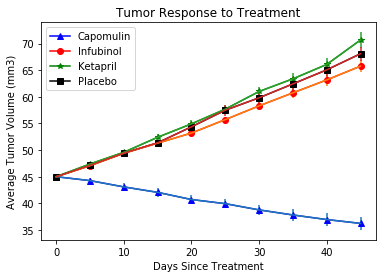

In [6]:
# Generate the Plot (with Error Bars)

# Save the Figure

capomulin_tumorplt = plt.plot(df_reformatted.Timepoints, df_reformatted.Capomulin, marker = '^', color = 'blue',
                     label = "Capomulin")
plt.errorbar(df_reformatted.Timepoints, df_reformatted.Capomulin, yerr = camp_sems)

infubinol_tumorplt = plt.plot(df_reformatted.Timepoints, df_reformatted.Infubinol, marker = 'o', color = 'red',
                    label = "Infubinol")
plt.errorbar(df_reformatted.Timepoints, df_reformatted.Infubinol, yerr = infu_sems)


ketapril_tumorplt = plt.plot(df_reformatted.Timepoints, df_reformatted.Ketapril, marker = '*', color = 'green',
                   label = "Ketapril")
plt.errorbar(df_reformatted.Timepoints, df_reformatted.Ketapril, yerr = keta_sems)


placebo_tumorplt = plt.plot(df_reformatted.Timepoints, df_reformatted.Placebo, marker = 's', color = 'black',
                  label = "Placebo")
plt.errorbar(df_reformatted.Timepoints, df_reformatted.Placebo, yerr = plac_sems)




plt.legend(loc = "best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Days Since Treatment")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

df_meanmetabolism = df.groupby(['Drug', 'Timepoint']).mean()

del df_meanmetabolism['Tumor Volume (mm3)']

# df_meanmetabolism.head(len(df_meanmetabolism))

df_meanmetabolism.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


campmeta_sems= []
infumeta_sems = []
ketameta_sems = []
placmeta_sems = []

for i in timepointsreformatted:
    
    temp_sem = capomulin.loc[capomulin['Time Points'] == i]["Metastatic Sites"].sem()
    
    campmeta_sems.append(temp_sem)


for i in timepointsreformatted:
    
    temp_sem = infubinol.loc[infubinol['Time Points'] == i]["Metastatic Sites"].sem()
    
    infumeta_sems.append(temp_sem)

    
for i in timepointsreformatted:
    
    temp_sem = ketapril.loc[ketapril['Time Points'] == i]["Metastatic Sites"].sem()
    
    ketameta_sems.append(temp_sem)


for i in timepointsreformatted:
    
    temp_sem = placebo.loc[placebo['Time Points'] == i]["Metastatic Sites"].sem()
    
    placmeta_sems.append(temp_sem)


df_metasem_values = pd.DataFrame({'Time Points':timepointsreformatted, 'Capomulin Met. SEM' : campmeta_sems,
                                   'Infubinol Met. SEM' : infumeta_sems,
                                   'Ketapril Met. SEM' : ketameta_sems,
                                   'Placebo Met. SEM' : placmeta_sems})

df_metasem_values


,Time Points,Capomulin Met. SEM,Infubinol Met. SEM,Ketapril Met. SEM,Placebo Met. SEM
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.091652,0.098100,0.100947
2,10,0.125433,0.159364,0.142018,0.115261
3,15,0.132048,0.194015,0.191381,0.190221
4,20,0.161621,0.234801,0.236680,0.234064
5,25,0.181818,0.265753,0.288275,0.263888
6,30,0.172944,0.227823,0.347467,0.300264
7,35,0.169496,0.224733,0.361418,0.341412
8,40,0.175610,0.314466,0.315725,0.297294
9,45,0.202591,0.309320,0.278722,0.304240


In [10]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [11]:
df_meanmeta_reset = df_meanmetabolism.reset_index()

df_meanmeta_reset


df_capomulin_meta = df_meanmeta_reset.iloc[range(0,10),2].to_list() # Need this one

# df_ceftamin_tumor = pd.Series(df_meantumor_reset.iloc[range(10,20),2])

df_infubinol_meta = df_meanmeta_reset.iloc[range(20,30),2].to_list() # Need this one

df_ketapril_meta = df_meanmeta_reset.iloc[range(30,40),2].to_list() # Need this one

# df_naftisol_tumor = pd.Series(df_meantumor_reset.iloc[range(40,50),2])

df_placebo_meta = df_meanmeta_reset.iloc[range(50,60),2].to_list() # Need this one

# df_propriva_tumor = pd.Series(df_meantumor_reset.iloc[range(60,70),2])
# df_ramicane_tumor = pd.Series(df_meantumor_reset.iloc[range(70,80),2])
# df_stelasyn_tumor = pd.Series(df_meantumor_reset.iloc[range(80,90),2])
# df_zoniferol_tumor = pd.Series(df_meantumor_reset.iloc[range(90,100),2])

df_reformatted_meta = pd.DataFrame({"Timepoints": timepointsreformatted,
                               "Capomulin" : df_capomulin_meta, 
                               "Infubinol": df_infubinol_meta,
                               "Ketapril":df_ketapril_meta,
                               "Placebo": df_placebo_meta})

df_reformatted_meta


,Timepoints,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


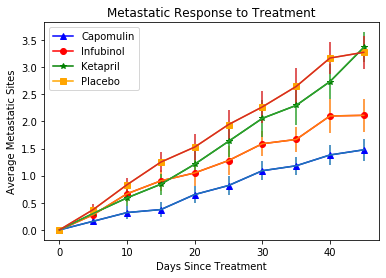

In [12]:
capomulin_metaplt = plt.plot(df_reformatted.Timepoints, df_reformatted_meta.Capomulin, marker = '^', color = 'blue',
                     label = "Capomulin")
plt.errorbar(df_reformatted.Timepoints, df_reformatted_meta.Capomulin, yerr = campmeta_sems)


infubinol_metaplt = plt.plot(df_reformatted.Timepoints, df_reformatted_meta.Infubinol, marker = 'o', color = 'red',
                    label = "Infubinol")
plt.errorbar(df_reformatted.Timepoints, df_reformatted_meta.Infubinol, yerr = infumeta_sems)

ketapril_metaplt = plt.plot(df_reformatted.Timepoints, df_reformatted_meta.Ketapril, marker = '*', color = 'green',
                   label = "Ketapril")
plt.errorbar(df_reformatted.Timepoints, df_reformatted_meta.Ketapril, yerr = ketameta_sems)

placebo_metaplt = plt.plot(df_reformatted.Timepoints, df_reformatted_meta.Placebo, marker = 's', color = 'orange',
                  label = "Placebo")
plt.errorbar(df_reformatted.Timepoints, df_reformatted_meta.Placebo, yerr = placmeta_sems)


plt.legend(loc = "best")
plt.title("Metastatic Response to Treatment")
plt.xlabel("Days Since Treatment")
plt.ylabel("Average Metastatic Sites")

plt.show()

In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

df_micesurvived = df.groupby(['Drug', 'Timepoint']).count()

df_micesurvived.head()

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23

In [15]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [16]:
df_micesurvived_reset = df_micesurvived.reset_index()

df_capomulin_survived = df_micesurvived_reset.iloc[range(0,10),2].to_list() # Need this one

# df_ceftamin_tumor = pd.Series(df_meantumor_reset.iloc[range(10,20),2])

df_infubinol_survived = df_micesurvived_reset.iloc[range(20,30),2].to_list() # Need this one

df_ketapril_survived = df_micesurvived_reset.iloc[range(30,40),2].to_list() # Need this one

# df_naftisol_tumor = pd.Series(df_meantumor_reset.iloc[range(40,50),2])

df_placebo_survived = df_micesurvived_reset.iloc[range(50,60),2].to_list() # Need this one

# df_propriva_tumor = pd.Series(df_meantumor_reset.iloc[range(60,70),2])
# df_ramicane_tumor = pd.Series(df_meantumor_reset.iloc[range(70,80),2])
# df_stelasyn_tumor = pd.Series(df_meantumor_reset.iloc[range(80,90),2])
# df_zoniferol_tumor = pd.Series(df_meantumor_reset.iloc[range(90,100),2])

df_reformatted_survived = pd.DataFrame({"Timepoints": timepointsreformatted,
                               "Capomulin" : df_capomulin_survived, 
                               "Infubinol": df_infubinol_survived,
                               "Ketapril":df_ketapril_survived,
                               "Placebo": df_placebo_survived})

df_reformatted_survived

,Timepoints,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


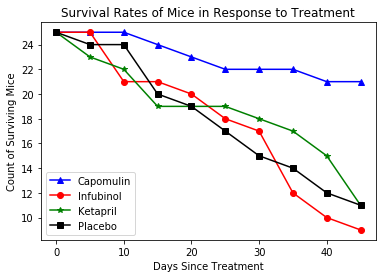

In [17]:
capomulin_survivedplt = plt.plot(df_reformatted.Timepoints, df_reformatted_survived.Capomulin, marker = '^', color = 'blue',
                     label = "Capomulin")
infubinol_survivedplt = plt.plot(df_reformatted.Timepoints, df_reformatted_survived.Infubinol, marker = 'o', color = 'red',
                    label = "Infubinol")
ketapril_survivedplt = plt.plot(df_reformatted.Timepoints, df_reformatted_survived.Ketapril, marker = '*', color = 'green',
                   label = "Ketapril")
placebo_survivedplt = plt.plot(df_reformatted.Timepoints, df_reformatted_survived.Placebo, marker = 's', color = 'black',
                  label = "Placebo")

plt.legend(loc = "best")
plt.title("Survival Rates of Mice in Response to Treatment")
plt.xlabel("Days Since Treatment")
plt.ylabel("Count of Surviving Mice")

plt.show()

In [18]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [20]:
# Percent change is difference between timepoint 45 to timepoint 0 divided by timepoint 0 value
# Only need mean tumor data for each drug
# Could be done better, but hopefully will work for now.

timepointsreformatted = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

# df_capomulin_percent = df_meantumor_reset.iloc[range(0,10),2] # Need this one
df_capomulin_percent = ((df_meantumor_reset.iloc[9,2] - df_meantumor_reset.iloc[0,2]) / df_meantumor_reset.iloc[0,2]) * 100

# df_ceftamin_percent = pd.Series(df_meantumor_reset.iloc[range(10,20),2])
df_ceftamin_percent = ((df_meantumor_reset.iloc[19,2] - df_meantumor_reset.iloc[10,2]) / df_meantumor_reset.iloc[10,2]) * 100

# df_infubinol_percent = df_meantumor_reset.iloc[range(20,30),2] # Need this one
df_infubinol_percent = ((df_meantumor_reset.iloc[29,2] - df_meantumor_reset.iloc[20,2]) / df_meantumor_reset.iloc[20,2]) * 100

# df_ketapril_percent = df_meantumor_reset.iloc[range(30,40),2] # Need this one
df_ketapril_percent = ((df_meantumor_reset.iloc[39,2] - df_meantumor_reset.iloc[30,2]) / df_meantumor_reset.iloc[30,2]) * 100

# df_naftisol_percent = pd.Series(df_meantumor_reset.iloc[range(40,50),2])
df_naftisol_percent = ((df_meantumor_reset.iloc[49,2] - df_meantumor_reset.iloc[40,2]) / df_meantumor_reset.iloc[40,2]) * 100

# df_placebo_percent = df_meantumor_reset.iloc[range(50,60),2] # Need this one
df_placebo_percent = ((df_meantumor_reset.iloc[59,2] - df_meantumor_reset.iloc[50,2]) / df_meantumor_reset.iloc[50,2]) * 100

# df_propriva_percent = pd.Series(df_meantumor_reset.iloc[range(60,70),2])
df_propriva_percent = ((df_meantumor_reset.iloc[69,2] - df_meantumor_reset.iloc[60,2]) / df_meantumor_reset.iloc[60,2]) * 100

# df_ramicane_percent = pd.Series(df_meantumor_reset.iloc[range(70,80),2])
df_ramicane_percent = ((df_meantumor_reset.iloc[79,2] - df_meantumor_reset.iloc[70,2]) / df_meantumor_reset.iloc[70,2]) * 100

# df_stelasyn_percent = pd.Series(df_meantumor_reset.iloc[range(80,90),2])
df_stelasyn_percent = ((df_meantumor_reset.iloc[89,2] - df_meantumor_reset.iloc[80,2]) / df_meantumor_reset.iloc[80,2]) * 100

# df_zoniferol_percent = pd.Series(df_meantumor_reset.iloc[range(90,100),2])
df_zoniferol_percent = ((df_meantumor_reset.iloc[99,2] - df_meantumor_reset.iloc[90,2]) / df_meantumor_reset.iloc[90,2]) * 100


tumor_percentchange = {"Capomulin" :df_capomulin_percent,
                       "Ceftamin" : df_ceftamin_percent,
                       "Infubinol" : df_infubinol_percent,
                       "Ketapril" :df_ketapril_percent,
                       "Naftisol" :df_naftisol_percent,
                       "Placebo" : df_placebo_percent,
                       "Propriva" :df_propriva_percent,
                       "Ramicane" : df_ramicane_percent,
                       "Stelasyn" : df_stelasyn_percent,
                       "Zoniferol" : df_zoniferol_percent}

df_capomulin_percent

tumor_percentchange



{'Capomulin': -19.475302667894155,
 'Ceftamin': 42.516491855897414,
 'Infubinol': 46.12347172785184,
 'Ketapril': 57.02879468660604,
 'Naftisol': 53.923347134769195,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320634,
 'Ramicane': -22.32090046276666,
 'Stelasyn': 52.085134287898995,
 'Zoniferol': 46.57975086509522}

In [21]:
# Store all Relevant Percent Changes into a Tuple



# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
# fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

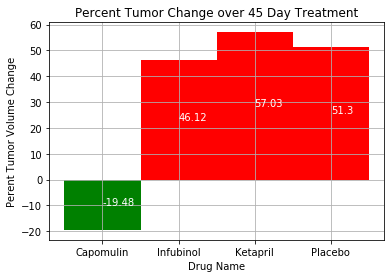

In [22]:
barchart_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
barchart_values = [df_capomulin_percent, df_infubinol_percent, df_ketapril_percent, df_placebo_percent]

# xticks = np.arange(len(barchart_labels))

size = 4.0

ax = plt.subplot() # for four bars

ax.bar(size/4, df_capomulin_percent, width = size/4, color = "green", label = "Capomulin")
ax.bar(2*(size/4), df_infubinol_percent, width = size/4, color = "red", label = "Infubinol")
ax.bar(3 *(size/4), df_ketapril_percent, width = size/4, color = "red", label = "Ketapril")
ax.bar(4 *(size/4), df_placebo_percent, width = size/4, color = "red", label = "Placebo")
ax.grid()
plt.title("Percent Tumor Change over 45 Day Treatment")
plt.xlabel("Drug Name")
plt.ylabel("Perent Tumor Volume Change")

xticks = [size/4, 2*(size/4), 3*(size/4), size]

plt.xticks(xticks, barchart_labels)

for i in range(len(xticks)):
    value = round(barchart_values[i], 2)
    plt.annotate(str(value) , xy = (xticks[i], barchart_values[i]/2 ), color = "white" )

plt.show()

In [23]:
# Observations
# ~~~~~~~~~~~~~~~~~~~~

# 1) From the mean tumor volume plot, it's readily aparent that capomulin as a drug is the most effective
#    stopping tumor growth and preventing new metastatic sites from developing.
# 2) From the mice survival plot, we can see that capomulin has the best effect in keeping its reciepients
#    alive.
# 3) Aside from capomulin, ramicane may also have some efficacy in tumor reduction.